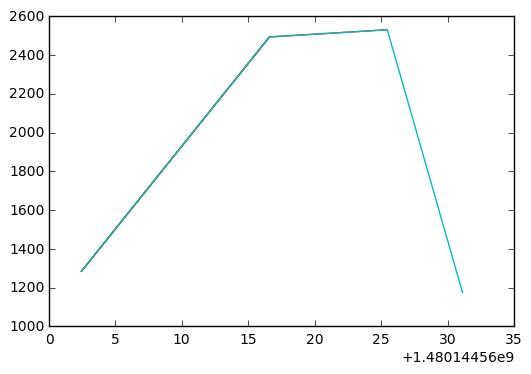

In [ ]:
#!/usr/bin/python
#+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
#|R|a|s|p|b|e|r|r|y|P|i|-|S|p|y|.|c|o|.|u|k|
#+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
#
# ultrasonic_2.py
# Measure distance using an ultrasonic module
# in a loop.
#
# Ultrasonic related posts:
# http://www.raspberrypi-spy.co.uk/tag/ultrasonic/
#
# Author : Matt Hawkins
# Date   : 16/10/2016
# -----------------------

%matplotlib inline

# -----------------------
# Import required Python libraries
# -----------------------
from __future__ import print_function
import time
import RPi.GPIO as GPIO
import sys
import matplotlib.pyplot as plt
# import pandas as pd
import pylab as pl
from IPython import display


PLOT_N_PTS = 25
MAX_DEPTH = 0

# -----------------------
# Define some functions
# -----------------------

# Print iterations progress
def print_progress(iteration, total, prefix = '', suffix = '', decimals = 1, barLength = 100):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        barLength   - Optional  : character length of bar (Int)
    """
    formatStr       = "{0:." + str(decimals) + "f}"
    percents        = formatStr.format(100 * (iteration / float(total)))
    filledLength    = int(round(barLength * iteration / float(total)))
    bar             = '█' * filledLength + '-' * (barLength - filledLength)
    sys.stdout.write('\r%s |%s| %s%s %s' % (prefix, bar, percents, '%', suffix)),
    sys.stdout.flush()
    if iteration == total:
        sys.stdout.write('\n')
        sys.stdout.flush()

def measure():
    # This function measures a distance
    GPIO.output(GPIO_TRIGGER, True)
    # Wait 10us
    time.sleep(0.00001)
    GPIO.output(GPIO_TRIGGER, False)
    start = time.time()

    while GPIO.input(GPIO_ECHO)==0:
        start = time.time()

    while GPIO.input(GPIO_ECHO)==1:
        stop = time.time()

    elapsed = stop-start
    distance = (elapsed * speedSound)/2

    return distance


def measure_average():
    # This function takes 3 measurements and
    # returns the average.

    distance1=measure()
    time.sleep(0.1)
    distance2=measure()
    time.sleep(0.1)
    distance3=measure()
    distance = distance1 + distance2 + distance3
    distance = distance / 3
    return distance

# -----------------------
# Main Script
# -----------------------

# Use BCM GPIO references
# instead of physical pin numbers
GPIO.setmode(GPIO.BCM)

# Define GPIO to use on Pi
GPIO_TRIGGER = 23
GPIO_ECHO    = 24

# Speed of sound in cm/s at temperature
temperature = 20
speedSound = 33100 + (0.6*temperature)

print("Ultrasonic Measurement")
print("Speed of sound is",speedSound/100,"m/s at ",temperature,"deg")

# Set pins as output and input
GPIO.setup(GPIO_TRIGGER,GPIO.OUT)  # Trigger
GPIO.setup(GPIO_ECHO,GPIO.IN)      # Echo

# Set trigger to False (Low)
GPIO.output(GPIO_TRIGGER, False)

# Allow module to settle
time.sleep(0.5)

# Wrap main content in a try block so we can
# catch the user pressing CTRL-C and run the
# GPIO cleanup function. This will also prevent
# the user seeing lots of unnecessary error
# messages.
distances = {'time':[], 'distance':[]}
try:
    while True:
        distance = measure_average()
        #print("Distance : {0:5.1f}".format(distance))
        if len(distances['time']) > PLOT_N_PTS:
            distances['time'].remove(distances['time'][0])
            distances['distance'].remove(distances['distance'][0])
        distances['time'].append(time.time())
        distances['distance'].append(distance)
        #print(pd.DataFrame(distances))
        #print(distances)
        #plt.plot(range(len(distances['time'])),distances['distance'])
        #plt.show()
        
        pl.plot(distances['time'],distances['distance'])
        display.clear_output(wait=True)
        display.display(pl.gcf())
        MAX_DEPTH = max(distance,len(distances['distance']), MAX_DEPTH)
        #print_progress(iteration=distance,
        #               total=MAX_DEPTH,
        #               prefix = '', suffix = '', decimals = 1, barLength = 100)
        time.sleep(1)

except KeyboardInterrupt:
    # User pressed CTRL-C
    # Reset GPIO settings
    GPIO.cleanup()